A: Sample Distribution e Sampling Distribution
A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

Situação: seguindo as mesmas diretrizes políticas e organizacionais como foi descrito na Atividade 02, umas das regras alinhadas às estratégias de negócios da empresa é manter problemas operacionais sempre abaixo de 6%. Como foi demonstrado nos exemplos executados, os resultados obtidos mostram que todas as demandas de incidentes da empresa não são resolvidos dentro dos parâmetros aceitos pela companhia.
	Para simular uma situação oposta a que foi citada anteriormente, no código foram adicionadas duas bases de dados no qual:
	rootcause_seccess.csv =  Atende política corporativa (problemas operacionais abaixo de 6%)
	rootcause_failure.csv = Não atende política corporativa (problemas operacionais abaixo de 6%)

Para validar esses resultados basta alterá-los na questão B, bloco de  códigos 05 e 06 da atividade 02 do arquivo do GitHub.

Resolução da questão A: será aplicada a Sample Distribution nas duas bases de dados,e coletadas suas respectivas amostras. Em seguida as médias das ocorrências adquiridas, aplicamos o Sampling Distribution, resultado será um pipeline no qual analisa estatisticamente a probabilidade de reincidência de falhas como micro motor de decisão automática sobre o que é mais provável de dar errado no futuro, baseado em históricos de RootCause

Requisitos da questão:
População artificial:
Varíavel de teste : RootCause(inputs 1 e 20)
Sample distribution and Sampling distribution
Avaliação de probabilidade:t-test

Nota: ao executar o código para melhor explicar a questão use 11 e 20 onde a Ho são bens distintos.(30 registros em 100 amostras coletadas)

1. Falha no balanceador de carga   2. Conexão instável                3. Curto-circuito                  
4. Erro no servidor                5. Falha na aplicação              6. Atualização mal aplicada        
7. Falha de armazenamento          8. Problema de rede                9. Erro de software                
10. Erro de comunicação            11. Problema de segurança          12. Problema de integração         
13. Falha de roteador              14. Falha de hardware              15. Erro no sistema de monitoramento
16. Falha no firewall              17. Falha no banco de dados        18. Erro de rede externa           
19. Erro de configuração           20. Erro de firmware               
Selected record: Erro de firmware
Record Erro de firmware: 10
Record Erro de firmware: 11


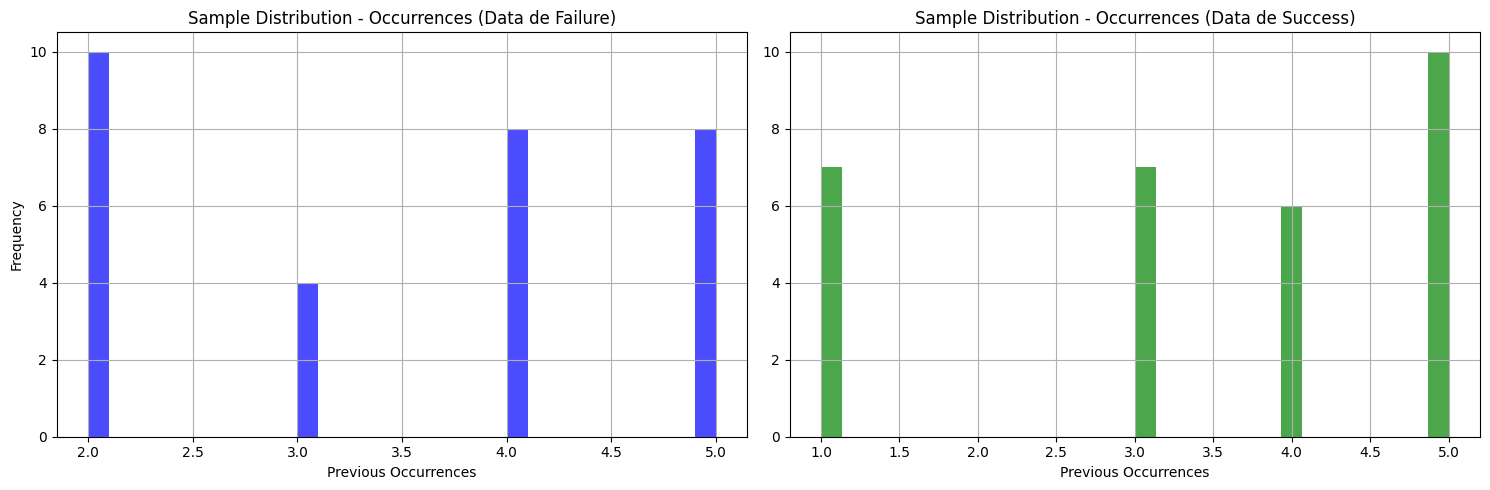

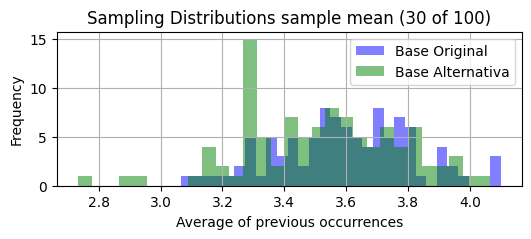

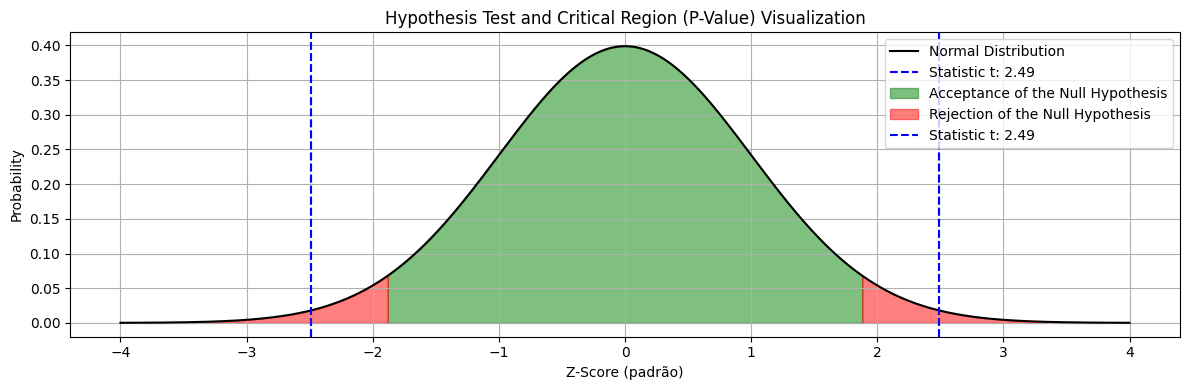

Statistic t: 2.4924092345519497
P-value: 0.013508564945028669
There is a significant difference.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm

rootcause = 'https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_failure.csv'
rootcause_alternative = 'https://raw.githubusercontent.com/ANDRERAIMUNDO/data-atividade-2/main/rootcause_success.csv'

df1 = pd.read_csv(rootcause)
df2 = pd.read_csv(rootcause_alternative)

rootcauses = df1['RootCause'].unique()
for i, cause in enumerate(rootcauses, 1):
    print(f"{i}. {cause}".ljust(35), end="")
    if i % 3 == 0:
        print()
rootcause_target = rootcauses[int(input("\nRootCause check: ")) - 1]
print(f"\nSelected record: {rootcause_target}")

df1_filtered = df1[df1['RootCause'] == rootcause_target]
df2_filtered = df2[df2['RootCause'] == rootcause_target]
column = 'Ocorrencias_anteriores'
#30 samples
sample_success = np.random.choice(df1_filtered[column], size=30, replace=True)
sample_failure = np.random.choice(df2_filtered[column], size=30, replace=True)
print("Record " + rootcause_target + ":", len(df1_filtered))
print("Record " + rootcause_target + ":", len(df2_filtered))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(sample_success, bins=30, alpha=0.7, color='blue')
axs[0].set_title('Sample Distribution - Occurrences (Data de Failure)')
axs[0].set_xlabel('Previous Occurrences')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)
axs[1].hist(sample_failure, bins=30, alpha=0.7, color='green')
axs[1].set_title('Sample Distribution - Occurrences (Data de Success)')
axs[1].set_xlabel('Previous Occurrences')
axs[1].grid(True)
plt.tight_layout()
plt.show()

